[Efficient Estimation of Word Representations in
Vector Space](https://arxiv.org/pdf/1301.3781.pdf)

In [ ]:
!pip install -U sentence-transformers transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=3084d9906192a21e344581b0f5ea46e7eed156f29fb236c63549bca0e53f4d35
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
# Import thư viện
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [ ]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [ ]:
# Tự xây dựng mô hình từ bộ dữ liệu có sẵn
model = Word2Vec(sentences=common_texts, # Dữ liệu truyền vào
                 vector_size=100,  # Độ lớn của vector
                 window=5,  # Độ lớn cửa số huấn luyện
                 min_count=1, # Ngưỡng tối thiểu của 1 từ
                 workers=4,
                 )

In [ ]:
# Lưu mô hình
model.save("word2vec.model")

In [ ]:
# Tải lại mô hình
model = Word2Vec.load("word2vec.model")

In [ ]:
# Huấn luyện tiếp mô hình
# model.train([["system", "system"]], epoch = 1)

In [ ]:
# Lấy vector biểu diễn của 1 từ
vector = model.wv['computer']
vector

array([-0.00515774, -0.00667028, -0.0077791 ,  0.00831315, -0.00198292,
       -0.00685696, -0.0041556 ,  0.00514562, -0.00286997, -0.00375075,
        0.0016219 , -0.0027771 , -0.00158482,  0.0010748 , -0.00297881,
        0.00852176,  0.00391207, -0.00996176,  0.00626142, -0.00675622,
        0.00076966,  0.00440552, -0.00510486, -0.00211128,  0.00809783,
       -0.00424503, -0.00763848,  0.00926061, -0.00215612, -0.00472081,
        0.00857329,  0.00428459,  0.0043261 ,  0.00928722, -0.00845554,
        0.00525685,  0.00203994,  0.0041895 ,  0.00169839,  0.00446543,
        0.0044876 ,  0.0061063 , -0.00320303, -0.00457706, -0.00042664,
        0.00253447, -0.00326412,  0.00605948,  0.00415534,  0.00776685,
        0.00257002,  0.00811905, -0.00138761,  0.00808028,  0.0037181 ,
       -0.00804967, -0.00393476, -0.0024726 ,  0.00489447, -0.00087241,
       -0.00283173,  0.00783599,  0.00932561, -0.0016154 , -0.00516075,
       -0.00470313, -0.00484746, -0.00960562,  0.00137242, -0.00

In [ ]:
# Tìm các từ tương tự
sims = model.wv.most_similar('computer', topn=10)
sims

[('system', 0.21617139875888824),
 ('survey', 0.04468922317028046),
 ('interface', 0.015203381888568401),
 ('time', 0.0019510635174810886),
 ('trees', -0.03284316882491112),
 ('human', -0.07424270361661911),
 ('response', -0.09317591041326523),
 ('graph', -0.09575342386960983),
 ('eps', -0.10513808578252792),
 ('user', -0.16911619901657104)]

In [ ]:
# Danh sách các mô hình đã được huấn luyện
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [ ]:
import gensim.downloader
glove_vectors = gensim.downloader.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
glove_vectors["vietnam"]

array([ 1.1109e-02, -6.7373e-02,  5.7753e-02,  1.0274e-01,  4.9490e-02,
        6.0427e-02,  3.8547e-02, -7.9938e-02,  4.6827e-02,  2.8605e-02,
       -2.8302e-02, -3.8657e-02,  2.8699e-02,  1.7875e-02,  1.6647e-02,
        1.4170e-02,  1.6632e-01, -1.2334e-01,  6.6212e-02,  1.2802e-02,
        6.9697e-02,  6.7726e-02, -3.1689e-02,  4.1474e-02, -3.0192e-03,
       -1.2462e-01,  9.2833e-02, -6.1775e-02, -3.8054e-02, -5.7218e-02,
        5.7590e-02,  2.7799e-02, -1.6179e-02, -6.4657e-03,  2.5825e-02,
       -6.5993e-04,  5.3990e-02, -1.7085e-02,  2.3888e-02,  6.5464e-02,
       -5.4564e-02, -7.7235e-02,  7.8561e-02, -2.2847e-02,  2.0318e-02,
        8.7191e-02,  5.2792e-02,  2.0947e-03, -2.0514e-02,  2.5788e-02,
       -1.9485e-02,  3.2866e-03, -1.1596e-02, -2.1559e-02, -1.1568e-01,
       -5.2676e-02, -7.1225e-02,  4.4097e-02, -3.4331e-02,  1.7427e-02,
       -5.6686e-02,  6.9721e-03,  1.0717e-01, -1.1596e-01, -4.0253e-02,
       -3.8495e-02, -1.0143e-02, -1.2103e-01, -1.5410e-02,  6.37

In [ ]:
glove_vectors.most_similar('vietnam')

[('viet', 0.7330360412597656),
 ('vietnamese', 0.7146545648574829),
 ('cambodia', 0.7000673413276672),
 ('Vietnam', 0.6909278035163879),
 ('VietNam', 0.6730378866195679),
 ('indochina', 0.6349312663078308),
 ('Vietnam.', 0.6270760297775269),
 ('korea', 0.6190986633300781),
 ('iraq', 0.6147821545600891),
 ('Vietnam-', 0.6122502088546753)]

In [ ]:
glove_vectors.similarity("vietnam", "hanoi")

0.5300986

In [ ]:
a1 = glove_vectors["grandfather"]
a2 = glove_vectors["grandmother"]
a3 = glove_vectors["woman"]
glove_vectors.most_similar(a3 + a1 - a2)

[('woman', 0.9466252326965332),
 ('man', 0.8305793404579163),
 ('woman--', 0.750378429889679),
 ('lady', 0.7140040993690491),
 ('woman-', 0.7119115591049194),
 ('womans', 0.6951075196266174),
 ('women', 0.6931669116020203),
 ('-woman', 0.6903579831123352),
 ('girl', 0.6849371194839478),
 ('trans-woman', 0.6799917221069336)]

In [ ]:
glove_vectors.most_similar(negative=['grandson'], topn=10)

[('၌', 0.4003842771053314),
 ('போக', 0.39666804671287537),
 ('சர', 0.39361128211021423),
 ('பில', 0.3928391933441162),
 ('উন', 0.3924608528614044),
 ('यद', 0.39237889647483826),
 ('துப', 0.3917131721973419),
 ('माह', 0.38935428857803345),
 ('எனும', 0.3876834511756897),
 ('தகவல', 0.3865732252597809)]

In [ ]:
import numpy as np
word1 = glove_vectors["vietnam"]
word2 = glove_vectors["hanoi"]
np.dot(word1, word2)/(np.linalg.norm(word1)* np.linalg.norm(word2))

0.73792803

In [ ]:
BERT embedding

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.3 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import BertTokenizer,BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")

In [ ]:
sentence = 'I really enjoyed this movie a lot.'

tokens = tokenizer.tokenize(sentence)
print(tokens)

['i', 'really', 'enjoyed', 'this', 'movie', 'a', 'lot', '.']


In [ ]:
tokens = ['[CLS]'] + tokens + ['[SEP]']
tokens

['[CLS]', 'i', 'really', 'enjoyed', 'this', 'movie', 'a', 'lot', '.', '[SEP]']

In [ ]:
max_length=15
padded_tokens = tokens + ['[PAD]' for _ in range(max_length-len(tokens))]
print("Padded tokens are \n {} ".format(padded_tokens))
attn_mask = [ 1 if token != '[PAD]' else 0 for token in padded_tokens  ]
print("Attention Mask are \n {} ".format(attn_mask))

Padded tokens are 
 ['[CLS]', 'i', 'really', 'enjoyed', 'this', 'movie', 'a', 'lot', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]'] 
Attention Mask are 
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0] 


In [ ]:
seg_ids = [0 for _ in range(len(padded_tokens))]

In [ ]:
sent_ids = tokenizer.convert_tokens_to_ids(padded_tokens)
token_ids = torch.tensor(sent_ids).unsqueeze(0)
attn_mask = torch.tensor(attn_mask).unsqueeze(0)
seg_ids   = torch.tensor(seg_ids).unsqueeze(0)

print(token_ids)
print(attn_mask)
print(seg_ids)

tensor([[ 101, 1045, 2428, 5632, 2023, 3185, 1037, 2843, 1012,  102,    0,    0,
            0,    0,    0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


In [ ]:
output = model(token_ids, attention_mask=attn_mask,token_type_ids=seg_ids)
last_hidden_state, pooler_output = output[0], output[1]

print(last_hidden_state.shape) #hidden states of each token
print(pooler_output.shape) #hidden states of [cls] (forward one linear layer and Tanh activation)

torch.Size([1, 15, 768])
torch.Size([1, 768])


[Sentence-BERT](https://arxiv.org/abs/1908.10084)

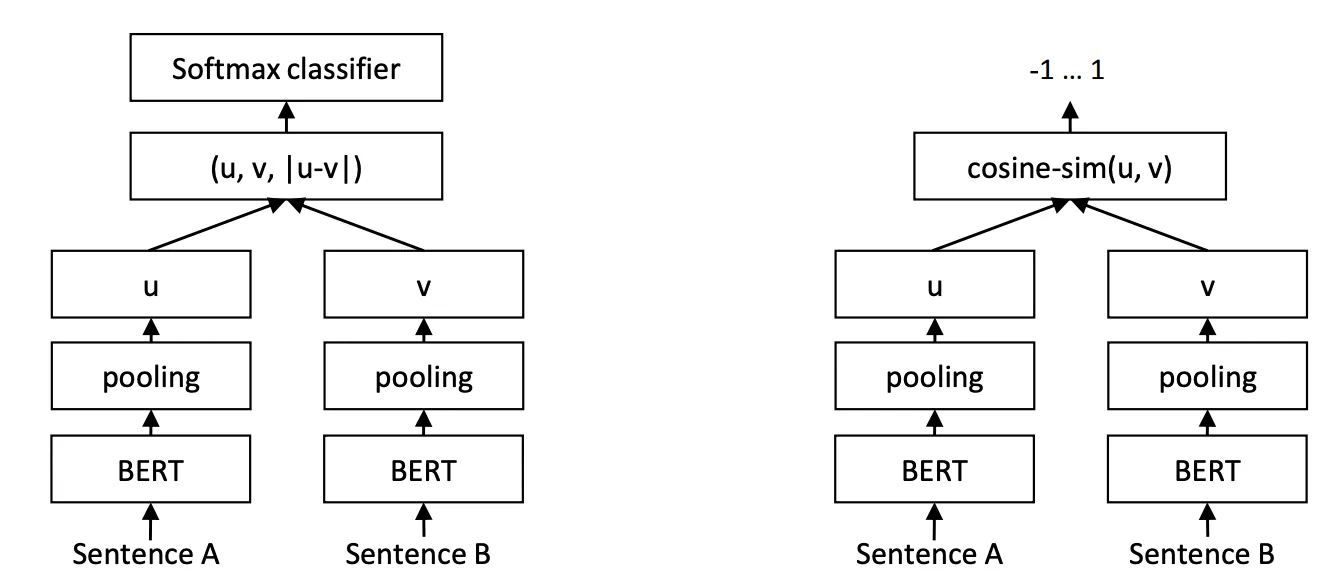

In [ ]:
from sentence_transformers import SentenceTransformer, util
sentences = ["I'm boring", "I'm full of happiness"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')


embedding_1= model.encode(sentences[0], convert_to_tensor=True)
embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

util.pytorch_cos_sim(embedding_1, embedding_2)

tensor([[0.3455]])

Mô hình [E5](https://arxiv.org/abs/2212.03533)

In [ ]:
import torch.nn.functional as F

from torch import Tensor
from transformers import AutoTokenizer, AutoModel


def average_pool(last_hidden_states: Tensor,
                 attention_mask: Tensor) -> Tensor:
    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]



input_texts = ['query: Tôi rất vui',
               'query: It is very hot today',
               "passage: I'm very happy",
               "passage: Hôm nay trời lạnh quá",
              ]

tokenizer = AutoTokenizer.from_pretrained('intfloat/multilingual-e5-large')
model = AutoModel.from_pretrained('intfloat/multilingual-e5-large')

# Tokenize the input texts
batch_dict = tokenizer(input_texts, max_length=512, padding=True, truncation=True, return_tensors='pt')

outputs = model(**batch_dict)
embeddings = average_pool(outputs.last_hidden_state, batch_dict['attention_mask'])

# normalize embeddings
embeddings = F.normalize(embeddings, p=2, dim=1)
scores = (embeddings[:2] @ embeddings[2:].T) * 100
print(scores.tolist())

[[90.29885864257812, 78.70536804199219], [74.1211929321289, 77.53548431396484]]
